In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import community #This is the python-louvain package we installed
import numpy as np
import itertools
import csv

***Question 1: For this part of the assignment, you need to create a graph by adding nodes and edges in a Python program using the networkx library. Visualize the created graph using matplotlib or plotly.***

In [2]:
def create_graph(graph):

    # extract nodes from graph
    nodes = set([i for i in itertools.chain.from_iterable(graph)])
    # create networkx graph
    g = nx.Graph()

    # add nodes
    for node in nodes:
        g.add_node(node)

    # add edges
    for edge in graph:
        g.add_edge(edge[0], edge[1])


#     # draw graph
    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True)

    # show graph
    plt.show()

In [3]:
#creating graph example
network = [tuple(np.random.randint(1, 10, 2)) for i in range(20)]

In [4]:
network

[(2, 5),
 (1, 2),
 (6, 4),
 (7, 6),
 (8, 6),
 (2, 2),
 (3, 1),
 (2, 7),
 (9, 8),
 (9, 1),
 (2, 1),
 (8, 8),
 (8, 1),
 (1, 5),
 (5, 1),
 (5, 2),
 (7, 8),
 (6, 5),
 (7, 2),
 (1, 6)]

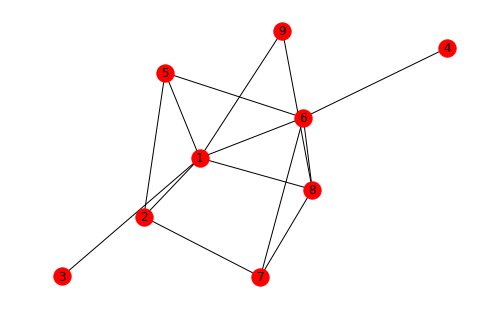

In [5]:
create_graph(network)

***Question 2: For this part of the assignment, read in data for a graph in the form of nodes and edges from a CSV file. This detailed tutorial on Exploring and Analyzing Network Data with Python can serve as a great starting point. Create your own CSV files of nodes and edges and visualize them using plotly or python-igraph.***

### Loading data

In [33]:
nodes_data = pd.read_csv('data/network/nodelist.csv')

In [34]:
nodes_data.head()

,Name,Gender
0,Patrick Yang,male
1,Santosh,male
2,Akshay,male
3,Prince,male
4,Neerja,female


In [35]:
node_names = list(nodes_data.Name)

In [36]:
edges_data = pd.read_csv('data/network/edgelist.csv')

In [37]:
edges_data.head()

,Source,Target
0,Patrick Yang,John
1,Santosh,Akshay
2,Akshay,Vash
3,Prince,Ting Ting
4,Neerja,Alvira


In [38]:
edges = [tuple(i) for i in edges_data.values]

In [39]:
edges

[('Patrick Yang', 'John'),
 ('Santosh', 'Akshay'),
 ('Akshay', 'Vash'),
 ('Prince', 'Ting Ting'),
 ('Neerja', 'Alvira'),
 ('Deena', 'Vash'),
 ('Arpita', 'Ting Ting'),
 ('Asmita', 'Fei'),
 ('Kerem', 'Nishan'),
 ('Jake', 'Kerem'),
 ('Spence', 'Kerem'),
 ('John', 'Akshay'),
 ('Ting Ting', 'John'),
 ('Danai', 'Sooraj'),
 ('Devesh', 'Kunal'),
 ('Kunal', 'Patrick Yang'),
 ('Fei', 'Danai'),
 ('David', 'Taylor'),
 ('Alvira', 'Matthew'),
 ('Vinay', 'Kunal'),
 ('Jason', 'John'),
 ('Ian', 'David'),
 ('Matthew', 'David'),
 ('Taylor', 'Alvira'),
 ('Vash', 'Arpita'),
 ('Davi', 'Shannon'),
 ('Jose', 'Neerja'),
 ('Holly', 'Santosh'),
 ('Ford', 'Asmita'),
 ('Nishan', 'Kerem'),
 ('Kaya', 'Taylor'),
 ('Sara', 'Fei'),
 ('Shannon', 'Kaya'),
 ('Tim', 'Arpita'),
 ('Tyler', 'Patrick Yang'),
 ('Santosh', 'Deena'),
 ('Akshay', 'Ting Ting'),
 ('Prince', 'Ford'),
 ('Neerja', 'Kerem'),
 ('Deena', 'Nishan'),
 ('Arpita', 'Spence'),
 ('Asmita', 'Davi'),
 ('Kerem', 'Ting Ting'),
 ('Spence', 'Nishan'),
 ('John', 'Tim')

In [40]:
len(edges)

200

In [41]:
len(node_names)

36

### Creating basic graph

In NetworkX, you can put these two lists together into a single network object that understands how nodes and edges are related. This object is called a Graph, referring to one of the common terms for data organized as a network

In [42]:
#intializaing graph object
G = nx.Graph()

In [43]:
#adding nodes and edges from iterables
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [44]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 184
Average degree:  10.2222


### Adding attributes

NetworkX provides two convenient functions for adding attributes to all of a Graph’s nodes or edges at once: `nx.set_node_attributes()` and `nx.set_edge_attributes()`. To use these functions, you’ll need your attribute data to be in the form of a Python dictionary, in which node names are the keys and the attributes you want to add are the values

In [47]:
gender_dict = {}

In [48]:
nodes_data.head(2)

,Name,Gender
0,Patrick Yang,male
1,Santosh,male


In [49]:
nodes_data_dict = nodes_data.to_dict()

In [50]:
nodes_data_dict.keys()

dict_keys(['Name', 'Gender'])

In [51]:
#creating a dictionary for attributes
for i in range(nodes_data.shape[0]):
    gender_dict[nodes_data_dict['Name'][i]] = nodes_data_dict['Gender'][i]

In [52]:
#adding attributes to the nodes
nx.set_node_attributes(G, gender_dict, 'gender')

In [53]:
#you can access attributes like this
for n in G.nodes():
    print(n, G.node[n]['gender'])

Patrick Yang male
Santosh male
Akshay male
Prince male
Neerja female
Deena female
Arpita female
Asmita female
Kerem male
Jake male
Spence male
John male
Ting Ting female
Danai female
Devesh male
Sooraj male
Kunal male
Fei female
David male
Alvira female
Vinay male
Jason male
Ian male
Matthew male
Taylor male
Vash male
Davi male
Jose male
Holly female
Ford male
Nishan male
Kaya female
Sara female
Shannon female
Tim male
Tyler male


### Metrics to analyze the network

In [54]:
#density
density = nx.density(G)
print("Network density:", density)

Network density: 0.2920634920634921


In [55]:
#shortest path
prince_kerem_path = nx.shortest_path(
    G, source="Prince", target="Neerja")

print("Shortest path between Prince and Kerem:", prince_kerem_path)
print("Length of that path:", len(prince_kerem_path) - 1)

Shortest path between Prince and Kerem: ['Prince', 'Kerem']
Length of that path: 1


In [27]:
#diameter
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

The above code throws an error because there are disconnected parts in our network. To check that:

In [ ]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

In [ ]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [ ]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

The final structural calculation you will make on this network concerns the concept of triadic closure. Triadic closure supposes that if two people know the same person, they are likely to know each other. If Fox knows both Fell and Whitehead, then Fell and Whitehead may very well know each other, completing a triangle in the visualization of three edges connecting Fox, Fell, and Whitehead. The number of these enclosed triangles in the network can be used to find clusters and communities of individuals that all know each other fairly well.

One way of measuring triadic closure is called clustering coefficient because of this clustering tendency, but the structural network measure you will learn is known as transitivity.11 Transitivity is the ratio of all triangles over all possible triangles. A possible triangle exists when one person (Fox) knows two people (Fell and Whitehead). So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

### Centrality

Most common centrality measures: degree, betweenness centrality, and eigenvector centrality.

**Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges. If a node has three lines extending from it to other nodes, its degree is three. Five edges, its degree is five. It’s really that simple. Since each of those edges will always have a node on the other end, you might think of degree as the number of people to which a given person is directly connected. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as hubs, and calculating degree is the quickest way of identifying hubs.

In [ ]:
#calculate degree
degree_dict = dict(G.degree(G.nodes()))
#add it as an attribute to each node
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
print(G.node['William Penn'])

In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
sorted_degree[:10]

You probably didn’t need NetworkX to tell you that William Penn, Quaker leader and founder of Pennsylvania, was important. Most social networks will have just a few hubs of very high degree, with the rest of similar, much lower degree.12 Degree can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes. And in many cases, those hubs it’s telling you about (like Penn or Quakerism co-founder Margaret Fell, with a degree of 13) are not especially surprising. In this case almost all of the hubs are founders of the religion or otherwise important political figures.

**Eigenvector centrality** is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.

In [ ]:
eigenvector_dict = nx.eigenvector_centrality(G)  # Run eigenvector centrality

In [ ]:
sorted_eigen_degree = sorted(
    eigenvector_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
sorted_eigen_degree[:10]

In [ ]:
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

**Betweenness centrality** is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

In [ ]:
# Run betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

In [ ]:
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

### Community detection

Another common thing to ask about a network dataset is what the subgroups or communities are within the larger social structure. Is your network one big, happy family where everyone knows everyone else? Or is it a collection of smaller subgroups that are only connected by one or two intermediaries? The field of community detection in networks is designed to answer these questions. There are many ways of calculating communities, cliques, and clusters in your network, but the most popular method currently is modularity. Modularity is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. Modularity gives you an overall score of how fractious your network is, and that score can be used to partition the network and return the individual communities.

In [29]:
communities = community.best_partition(G)

The above code will create a dictionary just like the ones created by centrality functions. `best_partition()` tries to determine the number of communities appropriate for the graph, and assigns each node a number (starting at 0), corresponding to the community it’s a member of. You can add these values to your network in the now-familiar way

In [30]:
nx.set_node_attributes(G, communities, 'modularity')

In [31]:
global_modularity = community.modularity(communities, G) #finding global modularity